In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils
from sklearn.metrics import auc, precision_recall_curve
from statistics import mean
from datetime import datetime

In [3]:
file_paths = {
    "msl128vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240824/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl128vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl256vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl256vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
}

In [4]:
dfs = []
for k, v in file_paths.items():
    df = pd.read_csv(v)
    df["model"] = k
    df["id"] = df["id"].str.extract(r"\['(.+)'\]")
    index_seq_pred = df[df["id"] == "WIV04"]["Human"].values[0]
    df["Human_pred_diff"] = df["Human"] - index_seq_pred
    dfs.append(df)
df = pd.concat(dfs)
df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff
0,0.000065,0.000388,0.730909,0.001499,0.000041,0.113935,0.113940,0.039224,UFO69279.1,Human,msl128vs30_s64_UA,-0.725078
1,0.000092,0.007977,0.110531,0.001202,0.000376,0.019780,0.851814,0.008228,QRX39425.1,Human,msl128vs30_s64_UA,0.012796
2,0.000114,0.001389,0.610157,0.001967,0.000125,0.084842,0.276525,0.024881,UWM38596.1,Human,msl128vs30_s64_UA,-0.562493
3,0.000098,0.000894,0.680466,0.001825,0.000087,0.092582,0.195584,0.028464,WRK13149.1,Human,msl128vs30_s64_UA,-0.643433
4,0.000151,0.001144,0.669717,0.002433,0.000129,0.102583,0.189518,0.034325,WGM84363.1,Human,msl128vs30_s64_UA,-0.649500
...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.004352,0.005115,0.037312,0.004393,0.000142,0.001899,0.931960,0.014827,UPP14409.1,Human,msl256vs30cls_s64_UA,0.105833
14,0.002070,0.002445,0.025827,0.002143,0.000042,0.000863,0.958030,0.008579,QRF70806.1,Human,msl256vs30cls_s64_UA,0.131903
15,0.034621,0.045248,0.032054,0.016227,0.001744,0.003702,0.820962,0.045442,QTY83052.1,Human,msl256vs30cls_s64_UA,-0.005165
16,0.003939,0.004815,0.025735,0.003317,0.000096,0.001126,0.948690,0.012282,UWM38596.1,Human,msl256vs30cls_s64_UA,0.122563


In [5]:
df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff
0,0.000065,0.000388,0.730909,0.001499,0.000041,0.113935,0.113940,0.039224,UFO69279.1,Human,msl128vs30_s64_UA,-0.725078
1,0.000092,0.007977,0.110531,0.001202,0.000376,0.019780,0.851814,0.008228,QRX39425.1,Human,msl128vs30_s64_UA,0.012796
2,0.000114,0.001389,0.610157,0.001967,0.000125,0.084842,0.276525,0.024881,UWM38596.1,Human,msl128vs30_s64_UA,-0.562493
3,0.000098,0.000894,0.680466,0.001825,0.000087,0.092582,0.195584,0.028464,WRK13149.1,Human,msl128vs30_s64_UA,-0.643433
4,0.000151,0.001144,0.669717,0.002433,0.000129,0.102583,0.189518,0.034325,WGM84363.1,Human,msl128vs30_s64_UA,-0.649500
...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.004352,0.005115,0.037312,0.004393,0.000142,0.001899,0.931960,0.014827,UPP14409.1,Human,msl256vs30cls_s64_UA,0.105833
14,0.002070,0.002445,0.025827,0.002143,0.000042,0.000863,0.958030,0.008579,QRF70806.1,Human,msl256vs30cls_s64_UA,0.131903
15,0.034621,0.045248,0.032054,0.016227,0.001744,0.003702,0.820962,0.045442,QTY83052.1,Human,msl256vs30cls_s64_UA,-0.005165
16,0.003939,0.004815,0.025735,0.003317,0.000096,0.001126,0.948690,0.012282,UWM38596.1,Human,msl256vs30cls_s64_UA,0.122563


In [13]:
mapping_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "input/data/coronaviridae/20240313/wiv04/SARS_CoV_2_Variants_ViralZone.csv"))

In [14]:
mapping_df["emergence_date"] = mapping_df["emergence_date"].apply(lambda x: datetime.strftime(datetime.strptime(x, '%b-%y'), '%m/%Y'))
mapping_df["emergence_date"] = pd.to_datetime(mapping_df["emergence_date"])

In [16]:
df = df.merge(mapping_df[["seq", "pango_lineage", "emergence_date"]], how="left", left_on="id", right_on="seq")

In [18]:
order = list(df.sort_values(by="emergence_date")["pango_lineage"].unique())
order

['WIV04',
 'B.1.1.28.1',
 'B.1.351',
 'B.1.1.7',
 'B.1.427, B.1.429',
 'B.1.1.28.2',
 'B.1.526',
 'B.1.1.1.C37',
 'B.1.525',
 'B.1.617.2',
 'B.1.617.1',
 'BA.1',
 'BA.5',
 'BA.4',
 'BQ.1.1',
 'XBB.1.5',
 'EG.5.1',
 'JN.1']

In [19]:
df[df["id"] == "WIV04"]["pango_lineage"] = "WIV04"
df[df["id"] == "WIV04"]

/tmp/ipykernel_1573121/3832981000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["id"] == "WIV04"]["pango_lineage"] = "WIV04"


,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff,seq_x,pango_lineage_x,seq_y,pango_lineage_y,seq,pango_lineage,emergence_date
15,0.000095,0.007646,0.121206,0.001257,3.702124e-04,0.021634,0.839018,0.008775,WIV04,Human,msl128vs30_s64_UA,0.0,WIV04,WIV04,WIV04,WIV04,WIV04,WIV04,2019-12-01
18,0.000345,0.000818,0.005766,0.000098,1.801593e-05,0.039582,0.952796,0.000576,WIV04,Human,msl128vs30cls_s64_UA,0.0,WIV04,WIV04,WIV04,WIV04,WIV04,WIV04,2019-12-01
38,0.000002,0.002570,0.129636,0.000005,3.571574e-07,0.003322,0.864463,0.000003,WIV04,Human,msl256vs30_s64_UA,0.0,WIV04,WIV04,WIV04,WIV04,WIV04,WIV04,2019-12-01
71,0.033003,0.043031,0.032350,0.015782,1.649558e-03,0.003668,0.826127,0.044390,WIV04,Human,msl256vs30cls_s64_UA,0.0,WIV04,WIV04,WIV04,WIV04,WIV04,WIV04,2019-12-01


In [20]:
df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff,seq_x,pango_lineage_x,seq_y,pango_lineage_y,seq,pango_lineage,emergence_date
0,0.000065,0.000388,0.730909,0.001499,0.000041,0.113935,0.113940,0.039224,UFO69279.1,Human,msl128vs30_s64_UA,-0.725078,UFO69279.1,BA.1,UFO69279.1,BA.1,UFO69279.1,BA.1,2021-12-01
1,0.000092,0.007977,0.110531,0.001202,0.000376,0.019780,0.851814,0.008228,QRX39425.1,Human,msl128vs30_s64_UA,0.012796,QRX39425.1,B.1.1.28.1,QRX39425.1,B.1.1.28.1,QRX39425.1,B.1.1.28.1,2020-07-01
2,0.000114,0.001389,0.610157,0.001967,0.000125,0.084842,0.276525,0.024881,UWM38596.1,Human,msl128vs30_s64_UA,-0.562493,UWM38596.1,BQ.1.1,UWM38596.1,BQ.1.1,UWM38596.1,BQ.1.1,2022-07-01
3,0.000098,0.000894,0.680466,0.001825,0.000087,0.092582,0.195584,0.028464,WRK13149.1,Human,msl128vs30_s64_UA,-0.643433,WRK13149.1,JN.1,WRK13149.1,JN.1,WRK13149.1,JN.1,2023-01-01
4,0.000151,0.001144,0.669717,0.002433,0.000129,0.102583,0.189518,0.034325,WGM84363.1,Human,msl128vs30_s64_UA,-0.649500,WGM84363.1,EG.5.1,WGM84363.1,EG.5.1,WGM84363.1,EG.5.1,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.004352,0.005115,0.037312,0.004393,0.000142,0.001899,0.931960,0.014827,UPP14409.1,Human,msl256vs30cls_s64_UA,0.105833,UPP14409.1,BA.4,UPP14409.1,BA.4,UPP14409.1,BA.4,2022-01-01
68,0.002070,0.002445,0.025827,0.002143,0.000042,0.000863,0.958030,0.008579,QRF70806.1,Human,msl256vs30cls_s64_UA,0.131903,QRF70806.1,B.1.525,QRF70806.1,B.1.525,QRF70806.1,B.1.525,2020-12-01
69,0.034621,0.045248,0.032054,0.016227,0.001744,0.003702,0.820962,0.045442,QTY83052.1,Human,msl256vs30cls_s64_UA,-0.005165,QTY83052.1,B.1.617.1,QTY83052.1,B.1.617.1,QTY83052.1,B.1.617.1,2021-10-01
70,0.003939,0.004815,0.025735,0.003317,0.000096,0.001126,0.948690,0.012282,UWM38596.1,Human,msl256vs30cls_s64_UA,0.122563,UWM38596.1,BQ.1.1,UWM38596.1,BQ.1.1,UWM38596.1,BQ.1.1,2022-07-01


<Figure size 432x288 with 0 Axes>

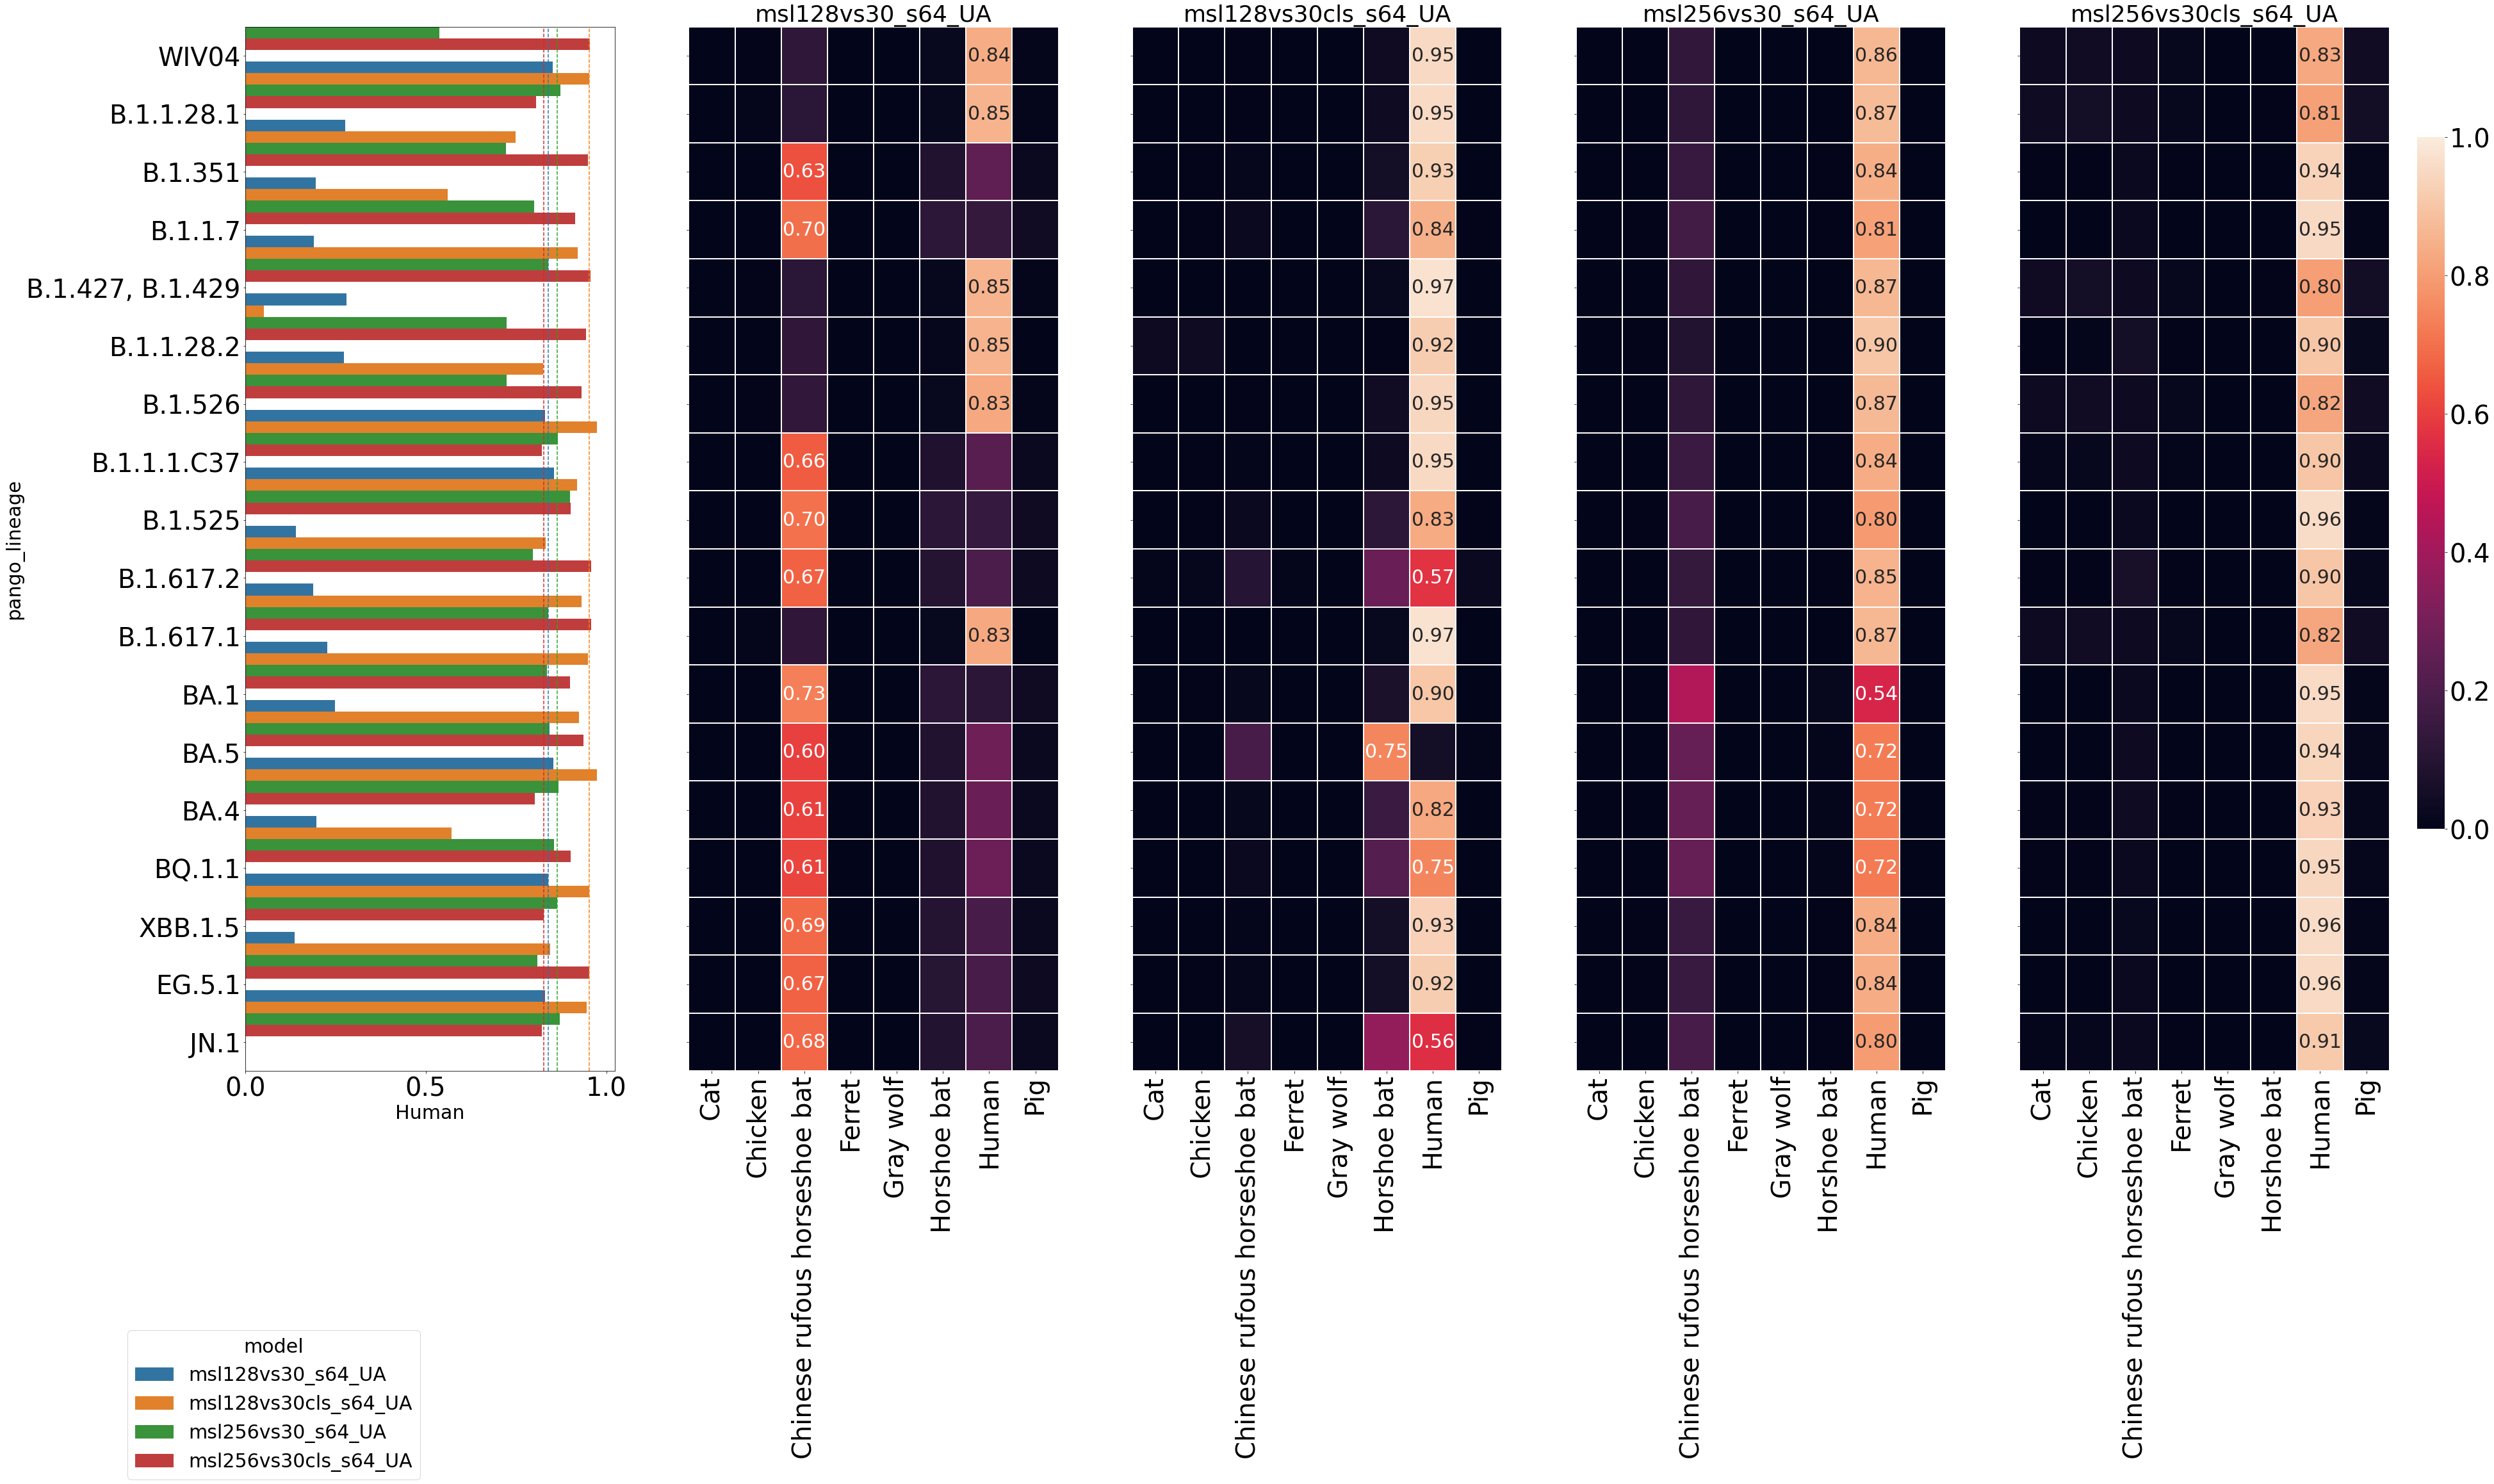

In [21]:
plt.clf()
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(1, 5, figsize=(60, 30), sharex=False, sharey=True, gridspec_kw={'width_ratios': [1, 1, 1, 1, 1]})

colors = sns.color_palette('tab10')
models = list(df["model"].unique())

color_palette_dict = {k: v for k, v in zip(models, colors)}

sns.barplot(df, y="pango_lineage", x="Human", hue="model", ax=axs[0])
               # boxprops={"facecolor": (.3, .5, .7, .5)})
sns.move_legend(axs[0], "lower right", bbox_to_anchor=(.5, -.4))

for model, color in zip(models, colors):
    axs[0].axvline(df[(df["model"] == model) & (df["id"] == "WIV04")]["Human"].values[0], color=color, linestyle="--")

    
    
def get_annotation_df(heatmap_df):
    annot_df = pd.DataFrame(0, index=heatmap_df.index, columns=heatmap_df.columns)
    annot_idx = heatmap_df.idxmax(axis=1).reset_index()
    for item in annot_idx.values:
        annot_df.loc[item[0], item[1]] = "{:,.2f}".format(heatmap_df.loc[item[0], item[1]])
    annot_df = annot_df.astype(str)
    annot_df[annot_df == "0"] = ""
    
    return annot_df
    
cbar_ax = fig.add_axes([.91, .3, .01, .5])
for i, model in enumerate(models):
    heatmap_df = df[df["model"] == model][["Cat", "Chicken", "Chinese rufous horseshoe bat", "Ferret", "Gray wolf", "Horshoe bat", "Human", "Pig", "pango_lineage"]].set_index("pango_lineage").reindex(index=order)
    get_annotation_df(heatmap_df)
    sns.heatmap(heatmap_df, ax=axs[i + 1], linewidth=.1, 
                annot=get_annotation_df(heatmap_df), fmt="",
                vmin=0, vmax=1,
                cbar=i == 0, 
                cbar_ax=None if i != 0 else cbar_ax)
    axs[i+1].set_title(model)
    axs[i+1].set(xlabel="", ylabel="")

plt.show()